In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import tensorflow as tf
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.__version__

'0.25.1'

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243838 sha256=a993b262989b8f4dd394be41fc92fbb87d43b6675477dfd903723e53456eb55c
  Stored in directory: C:\Users\anubh\AppData\Local\Temp\pip-ephem-wheel-cache-1v4laout\wheels\cc\d5\09\083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27089 sha256=efb1ed1525a941bbf2bf7d9c156e28a7536b5174b9f16dc2f9bace34743ec064
  Stored in directory: c:\users\anubh\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=4486de10872c7f463f89f671f0f16c7209e5fbae612f70f7debad84a6b53eb07
  Stored in directory: c:\users\anubh\appdata\local\pip\cache\wheels\40\98\a3\b654f24edcdcdb87d1f70d65a506fcfdf15289db129c594bcd
Successfully built pandas-profiling htmlmin phik
  Attempting uninstall: pandas
    Found existing installati

ERROR: phik 0.11.2 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
ERROR: phik 0.11.2 has requirement numpy>=1.18.0, but you'll have numpy 1.16.5 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\anubh\\anaconda3\\lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\anubh\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
#To force pyhton to show all output instead of the last output only
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\anubh\\Downloads'

In [32]:
#importing data from local repository
customer_data = pd.read_csv("Customer_Dataset_File.csv")

In [17]:
customer_data.head()
customer_data.tail()

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

        CustomerID  Region TownSize  Gender  Age  EducationYears  \
0  3964-QJWTRG-NPN       1        2  Female   20              15   
1  0648-AIPJSP-UVM       5        5    Male   22              17   
2  5195-TLUDJE-HVO       3        4  Female   67              14   
3  4459-VLPQUH-3OL       4        3    Male   23              16   
4  8158-SMTQFB-CNO       2        2    Male   26              16   

    JobCategory UnionMember  EmploymentLength Retired  ... CallWait  \
0  Professional         Yes                 0      No  ...      Yes   
1         Sales          No                 0      No  ...       No   
2         Sales          No                16      No  ...       No   
3         Sales          No                 0      No  ...       No   
4         Sales          No                 1      No  ...      Yes   

   CallForward  ThreeWayCalling  EBilling TVWatchingHours OwnsPC  \
0          Yes              Yes        No              13     No   
1          Yes              

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

           CustomerID  Region TownSize  Gender  Age  EducationYears  \
4995  3675-GZFGOT-QJN       2        2    Male   68              10   
4996  4699-LEPCCE-3UD       3        3    Male   51              14   
4997  8485-LLUICH-CVV       4        5    Male   75              17   
4998  9325-URAAUT-7FA       1        1    Male   47              19   
4999  8027-EXDZBF-OGR       3        5  Female   41              10   

       JobCategory UnionMember  EmploymentLength Retired  ... CallWait  \
4995  Professional          No                24      No  ...       No   
4996  Professional          No                 6      No  ...      Yes   
4997  Professional          No                24      No  ...      Yes   
4998         Sales          No                 3      No  ...       No   
4999        Crafts          No                20      No  ...       No   

      CallForward  ThreeWayCalling  EBilling TVWatchingHours OwnsPC  \
4995           No               No        No             

In [33]:
customer_data.shape
print(f'The data set has {customer_data.shape[0]} rows and {customer_data.shape[1]} columns')

(5000, 59)

The data set has 5000 rows and 59 columns


In [19]:
customer_data.describe()

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

           Region          Age  EducationYears  EmploymentLength  \
count  5000.00000  5000.000000     5000.000000       5000.000000   
mean      3.00140    47.025600       14.543000          9.730400   
std       1.42176    17.770338        3.281083          9.690929   
min       1.00000    18.000000        6.000000          0.000000   
25%       2.00000    31.000000       12.000000          2.000000   
50%       3.00000    47.000000       14.000000          7.000000   
75%       4.00000    62.000000       17.000000         15.000000   
max       5.00000    79.000000       23.000000         52.000000   

       DebtToIncomeRatio   CreditDebt    OtherDebt  HouseholdSize  \
count        5000.000000  5000.000000  5000.000000    4992.000000   
mean            9.954160     1.857326     3.654460       2.202324   
std             6.399783     3.415732     5.395172       1.391912   
min             0.000000     0.000000     0.000000       1.000000   
25%             5.100000     0.385520     

In [20]:
customer_data.dtypes

CustomerID              object
Region                   int64
TownSize                object
Gender                  object
Age                      int64
EducationYears           int64
JobCategory             object
UnionMember             object
EmploymentLength         int64
Retired                 object
HHIncome                object
DebtToIncomeRatio      float64
CreditDebt             float64
OtherDebt              float64
LoanDefault             object
MaritalStatus           object
HouseholdSize          float64
NumberPets             float64
NumberCats             float64
NumberDogs             float64
NumberBirds            float64
HomeOwner              float64
CarsOwned                int64
CarOwnership            object
CarBrand                object
CarValue                object
CommuteTime             object
PoliticalPartyMem       object
Votes                   object
CreditCard              object
CardTenure               int64
CardItemsMonthly         int64
CardSpen

In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
CustomerID             5000 non-null object
Region                 5000 non-null int64
TownSize               5000 non-null object
Gender                 4967 non-null object
Age                    5000 non-null int64
EducationYears         5000 non-null int64
JobCategory            4985 non-null object
UnionMember            5000 non-null object
EmploymentLength       5000 non-null int64
Retired                5000 non-null object
HHIncome               5000 non-null object
DebtToIncomeRatio      5000 non-null float64
CreditDebt             5000 non-null float64
OtherDebt              5000 non-null float64
LoanDefault            5000 non-null object
MaritalStatus          5000 non-null object
HouseholdSize          4992 non-null float64
NumberPets             4994 non-null float64
NumberCats             4993 non-null float64
NumberDogs             4992 non-null float64
NumberBird

In [22]:
#checking for missing values in data
customer_data.isna()

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

      CustomerID  Region  TownSize  Gender    Age  EducationYears  \
0          False   False     False   False  False           False   
1          False   False     False   False  False           False   
2          False   False     False   False  False           False   
3          False   False     False   False  False           False   
4          False   False     False   False  False           False   
...          ...     ...       ...     ...    ...             ...   
4995       False   False     False   False  False           False   
4996       False   False     False   False  False           False   
4997       False   False     False   False  False           False   
4998       False   False     False   False  False           False   
4999       False   False     False   False  False           False   

      JobCategory  UnionMember  EmploymentLength  Retired  ...  CallWait  \
0           False        False             False    False  ...     False   
1           False  

In [23]:


#printing null values for each column
print(customer_data.isnull().sum())

CustomerID              0
Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRental         0
EquipmentLas

We see that the columns Gender, Job CategoryHousehold Size, NumberCats, NumberDogs,NumberBirds, Homeowner all have missing values. 

In [24]:
#Alternatively we can also create a function to fetch the count of missing values

def missing_values(x):
    return sum(x.isnull())

print("The count of missing values in customer dataset", customer_data.apply(missing_values,axis=0))

ImportError: cannot import name 'FrameOrSeriesUnion' from 'pandas._typing' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\_typing.py)

In [25]:
#checking for duplicate values in data

duplicate_rows_customer_Data = customer_data[customer_data.duplicated()]
print('Number of duplicate rows in the data set:', duplicate_rows_customer_Data.shape[0])


Number of duplicate rows in the data set: 0


In [15]:
#Determining the Summary Statistics

customer_summary = customer_data.describe()
customer_summary = customer_summary.transpose()
print('the summary statistics for the customer data',customer_data.describe(include='all'))

the summary statistics for the customer data              CustomerID      Region TownSize  Gender          Age  \
count              5000  5000.00000     5000    4967  5000.000000   
unique             5000         NaN        6       2          NaN   
top     8922-AOMTSH-MV7         NaN        1  Female          NaN   
freq                  1         NaN     1436    2494          NaN   
mean                NaN     3.00140      NaN     NaN    47.025600   
std                 NaN     1.42176      NaN     NaN    17.770338   
min                 NaN     1.00000      NaN     NaN    18.000000   
25%                 NaN     2.00000      NaN     NaN    31.000000   
50%                 NaN     3.00000      NaN     NaN    47.000000   
75%                 NaN     4.00000      NaN     NaN    62.000000   
max                 NaN     5.00000      NaN     NaN    79.000000   

        EducationYears JobCategory UnionMember  EmploymentLength Retired  ...  \
count      5000.000000        4985        500

In [26]:
#installed pandas profiling on command prompt using command "conda install -c conda-forge pandas-profiling" 
#or using pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

pandas_profiling.ProfileReport(customer_data)

AttributeError: 'NoneType' object has no attribute 'axes'

We see that the columns Gender, Job CategoryHousehold Size, NumberCats, NumberDogs,NumberBirds, Homeowner all have missing values.

### Analyzing Gender Attribute

In [17]:
#Analyzing Gender Attribute. 

print("Total Number of null values in Gender attribute:",customer_data.Gender.isnull().sum())
print("Frequency distribution for Gender Attirbute:",customer_data['Gender'].value_counts())

Total Number of null values in Gender attribute: 33
Frequency distribution for Gender Attirbute: Female    2494
Male      2473
Name: Gender, dtype: int64


### Analyzing Household Size Attribute

In [18]:
#Analyzing HouseHold Size Attribute

print("Total Number of null values in Household Size attribute:",customer_data.HouseholdSize.isnull().sum())
print("Frequency distribution for HouseholdSize Attirbute:",customer_data['HouseholdSize'].value_counts())


Total Number of null values in Household Size attribute: 8
Frequency distribution for HouseholdSize Attirbute: 1.0    2032
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64


In [19]:
#replacing missing values with mode

customer_data['HouseholdSize'].fillna(mode(customer_data['HouseholdSize']).mode[0], inplace=True)                                                
print("Number of missing values in Household Size after replacement/Imputation:",customer_data['HouseholdSize'].isnull().sum())

Number of missing values in Household Size after replacement/Imputation: 0


In [20]:
#After Imputation on Household Size attribute

print("Total Number of null values in Household Size attribute:",customer_data.HouseholdSize.isnull().sum())
print("Frequency distribution for HouseholdSize Attirbute:",customer_data['HouseholdSize'].value_counts())

Total Number of null values in Household Size attribute: 0
Frequency distribution for HouseholdSize Attirbute: 1.0    2040
2.0    1466
3.0     552
4.0     520
5.0     287
6.0      97
7.0      29
8.0       7
9.0       2
Name: HouseholdSize, dtype: int64


In [21]:
#Analyzing NumberCats Size Attribute

print("Total Number of null values in NumberCats Size attribute:",customer_data.NumberCats.isnull().sum())
print("Frequency distribution for NumberCats Attirbute:",customer_data['NumberCats'].value_counts())

Total Number of null values in NumberCats Size attribute: 7
Frequency distribution for NumberCats Attirbute: 0.0    3408
1.0     922
2.0     463
3.0     159
4.0      34
5.0       5
6.0       2
Name: NumberCats, dtype: int64


In [22]:
#Analyzing NumberDogs Size Attribute

print("Total Number of null values in NumberDogs Size attribute:",customer_data.NumberDogs.isnull().sum())
print("Frequency distribution for NumberDogs Attirbute:",customer_data['NumberDogs'].value_counts())

Total Number of null values in NumberDogs Size attribute: 8
Frequency distribution for NumberDogs Attirbute: 0.0    3755
1.0     719
2.0     360
3.0     117
4.0      36
5.0       4
7.0       1
Name: NumberDogs, dtype: int64


In [23]:
#Analyzing NumberDogs Size Attribute

print("Total Number of null values in NumberBirds Size attribute:",customer_data.NumberBirds.isnull().sum())
print("Frequency distribution for NumberBirds Attirbute:",customer_data['NumberBirds'].value_counts())

Total Number of null values in NumberBirds Size attribute: 34
Frequency distribution for NumberBirds Attirbute: 0.0    4664
1.0     144
2.0      88
3.0      49
4.0      20
5.0       1
Name: NumberBirds, dtype: int64


In [24]:
#Analyzing Homeowner Size Attribute

print("Total Number of null values in Homeowner Size attribute:",customer_data.HomeOwner.isnull().sum())
print("Frequency distribution for Homeowner Attirbute:",customer_data['HomeOwner'].value_counts())

Total Number of null values in Homeowner Size attribute: 13
Frequency distribution for Homeowner Attirbute: 1.0    3140
0.0    1847
Name: HomeOwner, dtype: int64


In [25]:
#Analyzing House Hold Income- HHIncome

print("Total Number of null values in Household income attribute:",customer_data.HHIncome.isnull().sum())
print("Frequency distribution for Household income Attirbute:",customer_data['HHIncome'].value_counts())

Total Number of null values in Household income attribute: 0
Frequency distribution for Household income Attirbute:  $22,000.00      112
 $29,000.00      109
 $25,000.00      108
 $20,000.00      102
 $30,000.00      102
                ... 
 $575,000.00       1
 $409,000.00       1
 $248,000.00       1
 $315,000.00       1
 $345,000.00       1
Name: HHIncome, Length: 266, dtype: int64


In [26]:
customer_data.HHIncome.apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4995    <class 'str'>
4996    <class 'str'>
4997    <class 'str'>
4998    <class 'str'>
4999    <class 'str'>
Name: HHIncome, Length: 5000, dtype: object

In [27]:
customer_data.HHIncome.apply(type).value_counts()


<class 'str'>    5000
Name: HHIncome, dtype: int64

In [28]:
#creating functions to remove currency '$' synmbol from the column

def remove_currency_symbol(attribute):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(attribute, str):
        return(attribute.replace('$', '').replace(',', ''))
    return(attribute)

In [29]:
customer_data['HHIncome'] =customer_data['HHIncome'].apply(remove_currency_symbol).astype('float')
customer_data['HHIncome'].head()

0    31000.0
1    15000.0
2    35000.0
3    20000.0
4    23000.0
Name: HHIncome, dtype: float64

#### SciPy: 

SciPy is a scientific computation library that uses NumPy underneath.

SciPy stands for Scientific Python.

It provides more utility functions for optimization, stats and signal processing.

Like NumPy, SciPy is open source so we can use it freely.

Source: https://www.w3schools.com/python/scipy_intro.asp

In [30]:
sc.mean(customer_data['HHIncome'])

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.


54759.6

In [31]:
def coding(attribute, codeDict):
  colCoded = pd.Series(attribute, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [32]:
customer_data['LoanDefault'].head()
customer_data['LoanDefault'].value_counts()

0    Yes
1    Yes
2     No
3    Yes
4     No
Name: LoanDefault, dtype: object

No     3829
Yes    1171
Name: LoanDefault, dtype: int64

In [33]:
#applying Coding function on Loan Default 

customer_data['LoanDefault_Num'] = coding(customer_data['LoanDefault'],{'Yes':1,'No':2})
print(customer_data['LoanDefault_Num'].value_counts())

2    3829
1    1171
Name: LoanDefault_Num, dtype: int64


In [34]:
customer_data['Gender'].value_counts()

Female    2494
Male      2473
Name: Gender, dtype: int64

In [35]:
#After Coding

customer_data['Gender_Num'] = coding(customer_data['Gender'],{'Female':2,'Male':1})
customer_data['Gender_Num'].value_counts()

2.0    2494
1.0    2473
Name: Gender_Num, dtype: int64

### Analysis of Job Category Attribute

In [36]:
#Analyzing Job Catgeory

print("Total Number of null values in Job Category attribute:",customer_data.JobCategory.isnull().sum())
print("Frequency distribution for JobCategory Attirbute:",customer_data['JobCategory'].value_counts())

Total Number of null values in Job Category attribute: 15
Frequency distribution for JobCategory Attirbute: Sales           1635
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [37]:
#Imputing the attribute using mode value

customer_data['JobCategory'].fillna(mode(customer_data['JobCategory']).mode[0],inplace = True)

print("Total Number of null values in Job Category attribute after Imputation:",customer_data.JobCategory.isnull().sum())
print("Frequency distribution for JobCategory Attirbute after Imputation:",customer_data['JobCategory'].value_counts())


Total Number of null values in Job Category attribute after Imputation: 0
Frequency distribution for JobCategory Attirbute after Imputation: Sales           1650
Professional    1380
Labor            686
Service          620
Crafts           452
Agriculture      212
Name: JobCategory, dtype: int64


In [38]:
customer_data.describe(include = [np.number])

,Region,Age,EducationYears,EmploymentLength,HHIncome,DebtToIncomeRatio,CreditDebt,OtherDebt,HouseholdSize,NumberPets,...,NumberDogs,NumberBirds,HomeOwner,CarsOwned,CardTenure,CardItemsMonthly,PhoneCoTenure,TVWatchingHours,LoanDefault_Num,Gender_Num
count,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,4994.000000,...,4992.000000,4966.000000,4987.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,4967.000000
mean,3.00140,47.025600,14.543000,9.730400,5.475960e+04,9.954160,1.857326,3.654460,2.200400,3.066680,...,0.392829,0.111156,0.629637,2.130600,16.655800,10.17740,38.204800,19.645000,1.76580,1.502114
std,1.42176,17.770338,3.281083,9.690929,5.537751e+04,6.399783,3.415732,5.395172,1.391628,3.415625,...,0.796539,0.495832,0.482950,1.307473,12.020958,3.39114,22.661888,5.165609,0.42354,0.500046
min,1.00000,18.000000,6.000000,0.000000,9.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,1.000000
25%,2.00000,31.000000,12.000000,2.000000,2.400000e+04,5.100000,0.385520,0.980301,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,8.00000,18.000000,17.000000,2.00000,1.000000
50%,3.00000,47.000000,14.000000,7.000000,3.800000e+04,8.800000,0.926437,2.098540,2.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,14.000000,10.00000,38.000000,20.000000,2.00000,2.000000
75%,4.00000,62.000000,17.000000,15.000000,6.700000e+04,13.600000,2.063820,4.314780,3.000000,5.000000,...,0.000000,0.000000,1.000000,3.000000,26.000000,12.00000,59.000000,23.000000,2.00000,2.000000
max,5.00000,79.000000,23.000000,52.000000,1.073000e+06,43.100000,109.072596,141.459150,9.000000,21.000000,...,7.000000,5.000000,1.000000,8.000000,40.000000,23.00000,72.000000,36.000000,2.00000,2.000000


In [39]:
customer_data.describe(include = [np.object])

,CustomerID,TownSize,Gender,JobCategory,UnionMember,Retired,LoanDefault,MaritalStatus,CarOwnership,CarBrand,...,CallerID,CallWait,CallForward,ThreeWayCalling,EBilling,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
count,5000,5000,4967,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,6,2,6,2,2,2,2,3,3,...,2,2,2,2,2,2,2,2,2,2
top,8681-LQUWES-XE6,1,Female,Sales,No,No,No,Unmarried,Own,Domestic,...,No,No,No,No,No,Yes,No,No,No,No
freq,1,1436,2494,1650,4244,4262,3829,2599,3704,2287,...,2624,2605,2597,2610,3257,3164,2604,2626,4106,2637


In [40]:
customer_data.DebtToIncomeRatio.describe()

count    5000.000000
mean        9.954160
std         6.399783
min         0.000000
25%         5.100000
50%         8.800000
75%        13.600000
max        43.100000
Name: DebtToIncomeRatio, dtype: float64

In [41]:
print (pd.value_counts(customer_data['OwnsMobileDevice']))

No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64


In [42]:
#Binning continuous variables
def binning_values(attributes, cut_points, labels=None):
  #Define min and max values:
  minval = attributes.min()
  maxval = attributes.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  print(break_points)  
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(1,len(cut_points)+2)
  print(labels)
  #Binning using cut function of pandas
  colBin = pd.cut(attributes,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [43]:
#Binning Debit to Income Ratio
cut_points = [5,10,15]
#labels = ["low","medium","high","very high"]
#cust_df["DebtToIncomeRatio_Recoded"] = binning(cust_df["DebtToIncomeRatio"], cut_points,labels)
#To get labels that start from 0 modify above range function; To use labels add labels in binning function below
customer_data["DebtToIncomeRatio_Recoded"] = binning_values(customer_data["DebtToIncomeRatio"], cut_points)
print (pd.value_counts(customer_data["DebtToIncomeRatio_Recoded"], sort=False))

[0.0, 5, 10, 15, 43.1]
range(1, 5)
1    1215
2    1662
3    1176
4     947
Name: DebtToIncomeRatio_Recoded, dtype: int64


In [44]:
customer_data.Age.describe()

count    5000.000000
mean       47.025600
std        17.770338
min        18.000000
25%        31.000000
50%        47.000000
75%        62.000000
max        79.000000
Name: Age, dtype: float64

In [45]:
#Binning Age:
cut_points = [31,47,62]
labels = ["18-31",">31-47",">47-62",">62"]
customer_data["Age_Recoded"] = binning_values(customer_data["Age"], cut_points,labels)
print (pd.value_counts(customer_data["Age_Recoded"], sort=False))

[18, 31, 47, 62, 79]
['18-31', '>31-47', '>47-62', '>62']
18-31     1253
>31-47    1322
>47-62    1187
>62       1238
Name: Age_Recoded, dtype: int64


In [46]:
customer_data.PhoneCoTenure.describe()

count    5000.000000
mean       38.204800
std        22.661888
min         0.000000
25%        18.000000
50%        38.000000
75%        59.000000
max        72.000000
Name: PhoneCoTenure, dtype: float64

In [47]:
#Binning PhoneCoTenure:
cut_points = [18,38,59]
labels = ["0-18",">18-38",">38-59",">59"]
customer_data["PhoneCoTenure_Coded"] = binning_values(customer_data['PhoneCoTenure'], cut_points,labels)
print (pd.value_counts(customer_data['PhoneCoTenure_Coded'], sort=False))

[0, 18, 38, 59, 72]
['0-18', '>18-38', '>38-59', '>59']
0-18      1304
>18-38    1213
>38-59    1239
>59       1244
Name: PhoneCoTenure_Coded, dtype: int64


In [48]:
#Creating pivot tables; Higher levels of DebtToIncomeRatio for Yes to LoanDefault
LoanDefault_Grps = customer_data.pivot_table(values=["DebtToIncomeRatio"], index=['Gender','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (LoanDefault_Grps)

                                DebtToIncomeRatio
Gender LoanDefault Age_Recoded                   
Female No          18-31                 7.615773
                   >31-47                8.575502
                   >47-62                9.325333
                   >62                   9.301745
       Yes         18-31                12.100949
                   >31-47               13.888889
                   >47-62               18.449315
                   >62                  16.936667
Male   No          18-31                 7.415705
                   >31-47                8.225255
                   >47-62                9.120892
                   >62                  10.127181
       Yes         18-31                11.483000
                   >31-47               13.780745
                   >47-62               15.282022
                   >62                  18.703226


## Coding Nominal Variable into Numeric Variable

In [49]:
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(customer_data['OwnsMobileDevice']))
customer_data['OwnsMobileDevice_Coded'] = coding(customer_data['OwnsMobileDevice'], {'No':1,'Yes':2})
print ('\nAfter Coding:')
print (pd.value_counts(customer_data['OwnsMobileDevice_Coded']))

Before Coding:
No     2604
Yes    2396
Name: OwnsMobileDevice, dtype: int64

After Coding:
1    2604
2    2396
Name: OwnsMobileDevice_Coded, dtype: int64


In [50]:
customer_data_colnames = customer_data.columns.values.tolist()
customer_data_colnames

['CustomerID',
 'Region',
 'TownSize',
 'Gender',
 'Age',
 'EducationYears',
 'JobCategory',
 'UnionMember',
 'EmploymentLength',
 'Retired',
 'HHIncome',
 'DebtToIncomeRatio',
 'CreditDebt',
 'OtherDebt',
 'LoanDefault',
 'MaritalStatus',
 'HouseholdSize',
 'NumberPets',
 'NumberCats',
 'NumberDogs',
 'NumberBirds',
 'HomeOwner',
 'CarsOwned',
 'CarOwnership',
 'CarBrand',
 'CarValue',
 'CommuteTime',
 'PoliticalPartyMem',
 'Votes',
 'CreditCard',
 'CardTenure',
 'CardItemsMonthly',
 'CardSpendMonth',
 'ActiveLifestyle',
 'PhoneCoTenure',
 'VoiceLastMonth',
 'VoiceOverTenure',
 'EquipmentRental',
 'EquipmentLastMonth',
 'EquipmentOverTenure',
 'CallingCard',
 'WirelessData',
 'DataLastMonth',
 'DataOverTenure',
 'Multiline',
 'VM',
 'Pager',
 'Internet',
 'CallerID',
 'CallWait',
 'CallForward',
 'ThreeWayCalling',
 'EBilling',
 'TVWatchingHours',
 'OwnsPC',
 'OwnsMobileDevice',
 'OwnsGameSystem',
 'OwnsFax',
 'NewsSubscriber',
 'LoanDefault_Num',
 'Gender_Num',
 'DebtToIncomeRatio_Re

In [51]:
print(pd.value_counts(customer_data['HomeOwner']))

1.0    3140
0.0    1847
Name: HomeOwner, dtype: int64


In [52]:
customer_data['HomeOwner2'] = customer_data['HomeOwner'] + 1

In [53]:
print (pd.value_counts(customer_data['HomeOwner2']))

2.0    3140
1.0    1847
Name: HomeOwner2, dtype: int64


In [54]:
print(pd.value_counts(customer_data['VoiceLastMonth']))

 $12.60      31
 $15.00      29
 $23.70      28
 $22.50      25
 $16.95      25
             ..
 $132.45      1
 $135.15      1
 $106.05      1
 $106.20      1
 $191.10      1
Name: VoiceLastMonth, Length: 866, dtype: int64


In [55]:
print(pd.value_counts(customer_data['PhoneCoTenure']))

72    251
71    147
70     98
5      94
69     94
     ... 
22     51
49     48
40     47
51     40
0       3
Name: PhoneCoTenure, Length: 73, dtype: int64


In [56]:
customer_data['VoiceLastMonth_Coded'] = customer_data['VoiceLastMonth'].apply(remove_currency_symbol).astype('float')

In [57]:
sc.mean(customer_data['VoiceLastMonth_Coded'])

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.


40.41435000000001

## Customer Segmentation

Since the aim here is customer retention for a telecommunication company for clustering, it is important to pick the variable combinations that will 
1. Engage the customers with longer TV hours
2. Idenity Customer who can afford the services we provide

Keeping the above points in mind we can perform clustering using the following combination of variables. 

### variables related to Frequency 
Retired, HHIncome, LoanDefault

### variables related to recency 
Age,DataLastMonth, TVwatchingHours 

### variables related to revenue

HHIncome, 

### variables related to Frequency, Recency and Revenue 

TVWatchingHours,Retired,HHIncome

DataLastMonth,Age,DataOverTenure


LoanDefault, VoiceLastMonth,DebtToIncomeRatio 




In [27]:
#Selecting the columns or variables that you want to use for clustering
customer_data_kmeans = customer_data[['HHIncome','DebtToIncomeRatio', 'CreditDebt']]

In [28]:
customer_data_kmeans.head()
customer_data_kmeans.tail()

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

       HHIncome  DebtToIncomeRatio  CreditDebt
0   $31,000.00                11.1    1.200909
1   $15,000.00                18.6    1.222020
2   $35,000.00                 9.9    0.928620
3   $20,000.00                 5.7    0.022800
4   $23,000.00                 1.7    0.214659

ImportError: cannot import name 'is_url' from 'pandas.io.common' (C:\Users\anubh\Anaconda3\lib\site-packages\pandas\io\common.py)

           HHIncome  DebtToIncomeRatio  CreditDebt
4995   $196,000.00                 8.0    7.934080
4996    $83,000.00                15.0    3.336600
4997   $108,000.00                10.8    3.557520
4998   $189,000.00                10.8    5.021352
4999    $77,000.00                 6.2    2.267650

In [60]:
customer_data_kmeans.shape
customer_data_kmeans.info()

(5000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HHIncome           5000 non-null   float64
 1   DebtToIncomeRatio  5000 non-null   float64
 2   CreditDebt         5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


In [61]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_kmeans_scaled = scaler.fit_transform(customer_data_kmeans)

#Assign the scaled data to a DataFrame using the index keyword arguments
customer_kmeans_scaled_df = pd.DataFrame(customer_kmeans_scaled, index = customer_data_kmeans.index)
customer_kmeans_scaled_df.head()

,0,1,2
0,-0.429091,0.179061,-0.192194
1,-0.718046,1.351093,-0.186013
2,-0.356852,-0.008464,-0.271918
3,-0.627747,-0.664801,-0.537135
4,-0.573568,-1.289885,-0.480960


In [62]:
# statistics of scaled data
pd.DataFrame(customer_kmeans_scaled_df).describe()

,0,1,2
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,7.828183e-17,-4.884981e-18,1.103118e-16
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-8.264036e-01,-1.555546e+00,-5.438106e-01
25%,-5.555085e-01,-7.585640e-01,-4.309335e-01
50%,-3.026730e-01,-1.803616e-01,-2.725570e-01
75%,2.210577e-01,5.697388e-01,6.045996e-02
max,1.838909e+01,5.179731e+00,3.139181e+01


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

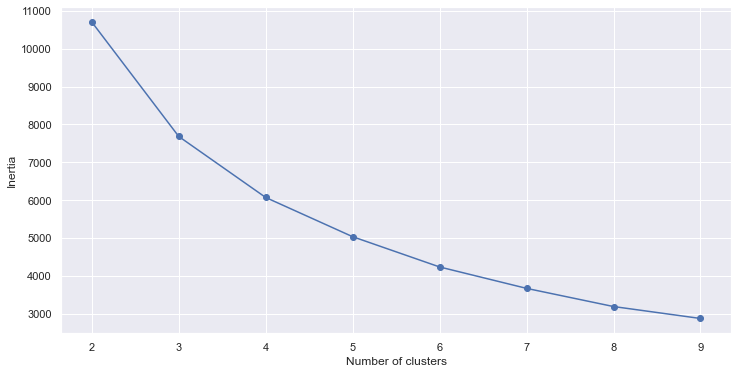

In [63]:
# Plot inertia for multiple cluster solutions against the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(customer_kmeans_scaled_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
customer_df_frame = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(customer_df_frame['Cluster'], customer_df_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [64]:
# Defining the kmeans function with initialization as k-means++; # You want to cluster into 5 segments
kmeans_5 = KMeans(n_clusters = 5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans_5.fit(customer_kmeans_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
# Inertia calculates the sum of all the points within a cluster from the centroid of that cluster.
# Determine inertia on the fitted data
kmeans_5.inertia_

5033.863074051401

In [66]:
pred_clus5 = kmeans_5.predict(customer_kmeans_scaled_df)

In [67]:
cust_df_frame_2 = pd.DataFrame(customer_kmeans_scaled_df)
cust_df_frame_2['cluster'] = pred_clus5
cust_df_frame_2['cluster'].value_counts()

0    2986
2    1332
4     562
1     118
3       2
Name: cluster, dtype: int64

In [68]:
# Using head shows the data structure of the resulting data frame
# There are 10 variables used for clustering and their scaled values are shown
# The last column is the cluster solution and shows the cluster to which obsevation belongs
# There are five segments starting from 0 to 4
cust_df_frame_2.head(5)

,0,1,2,cluster
0,-0.429091,0.179061,-0.192194,0
1,-0.718046,1.351093,-0.186013,2
2,-0.356852,-0.008464,-0.271918,0
3,-0.627747,-0.664801,-0.537135,0
4,-0.573568,-1.289885,-0.480960,0


In [69]:
# Get the cluster centroids
print(kmeans_5.cluster_centers_)

[[-0.31380988 -0.53598654 -0.32444304]
 [ 2.95480316  1.22846042  3.92473179]
 [-0.22097056  1.23162589  0.16836559]
 [17.68476622  1.62456747 25.30439796]
 [ 1.51095649 -0.3346548   0.41198085]]


In [70]:
# Create a new data column cluster5_2 to incorporate a cluster indicator variable running from 1 to 5
cust_df_frame_2['cluster5_2'] = cust_df_frame_2['cluster'] + 1
cust_df_frame_2.head(5)

,0,1,2,cluster,cluster5_2
0,-0.429091,0.179061,-0.192194,0,1
1,-0.718046,1.351093,-0.186013,2,3
2,-0.356852,-0.008464,-0.271918,0,1
3,-0.627747,-0.664801,-0.537135,0,1
4,-0.573568,-1.289885,-0.480960,0,1


In [71]:
# Get the cluster labels
print(kmeans_5.labels_)

[0 2 0 ... 4 4 0]


In [72]:
cust_df_frame_2['cluster5_2'].value_counts()

1    2986
3    1332
5     562
2     118
4       2
Name: cluster5_2, dtype: int64

In [73]:
# Plotting the cluster centers and the data points on a 2D plane; Need to think through this
#plt.scatter(customer_kmeans_scaled_df[:, 0], customer_kmeans_scaled_df[:, -1])

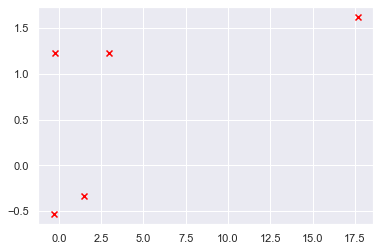

In [74]:
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], c='red', marker='x')

In [75]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(cust_df_frame_2, kmeans.labels_))

0.18602205775679964


C:\Users\priya\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\priya\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=5,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=0,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='silhouette', timings=False)

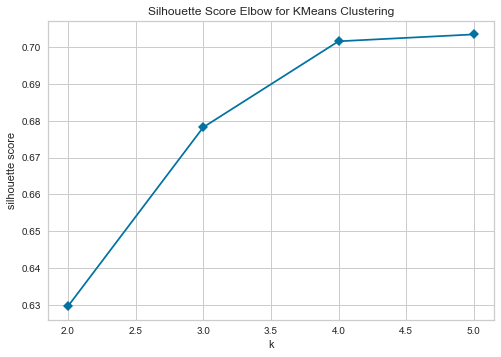

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [76]:
#install yellowbrick 
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(cust_df_frame_2)    
visualizer.poof()  

In [77]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_ALL = pd.DataFrame(pd.concat([cust_df_frame_2, customer_data], axis = 1))
cust_df_clus5_ALL.shape

(5000, 72)

In [78]:
cust_df_clus5_ALL.info

<bound method DataFrame.info of              0         1         2  cluster  cluster5_2       CustomerID  \
0    -0.429091  0.179061 -0.192194        0           1  3964-QJWTRG-NPN   
1    -0.718046  1.351093 -0.186013        2           3  0648-AIPJSP-UVM   
2    -0.356852 -0.008464 -0.271918        0           1  5195-TLUDJE-HVO   
3    -0.627747 -0.664801 -0.537135        0           1  4459-VLPQUH-3OL   
4    -0.573568 -1.289885 -0.480960        0           1  8158-SMTQFB-CNO   
...        ...       ...       ...      ...         ...              ...   
4995  2.550756 -0.305378  1.779227        4           5  3675-GZFGOT-QJN   
4996  0.510013  0.788518  0.433120        2           3  4699-LEPCCE-3UD   
4997  0.961504  0.132180  0.497804        4           5  8485-LLUICH-CVV   
4998  2.424338  0.132180  0.926403        4           5  9325-URAAUT-7FA   
4999  0.401654 -0.586666  0.120140        0           1  8027-EXDZBF-OGR   

      Region TownSize  Gender  Age  ...  OwnsFax NewsSu

In [79]:
# Using pandas crosstabs to create a cross tab of clusters by loan defaults
pd.crosstab(cust_df_clus5_ALL['cluster5_2'],cust_df_clus5_ALL['LoanDefault'],margins=True, normalize = 'columns')

LoanDefault,No,Yes,All
cluster5_2,,,
1,0.637503,0.465414,0.5972
2,0.009141,0.070880,0.0236
3,0.223035,0.408198,0.2664
4,0.000000,0.001708,0.0004
5,0.130321,0.053800,0.1124


In [80]:
# Using pandas pivot tables to create a cross tab of DebtToIncomeRatio by clusters by loan defaults by Age

Cluster_Grps = cust_df_clus5_ALL.pivot_table(values=["DebtToIncomeRatio"], index=['cluster5_2','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (Cluster_Grps)

                                    DebtToIncomeRatio
cluster5_2 LoanDefault Age_Recoded                   
1          No          18-31                 6.078302
                       >31-47                6.164151
                       >47-62                6.173774
                       >62                   6.710838
           Yes         18-31                 7.298945
                       >31-47                7.886614
                       >47-62                8.371429
                       >62                   9.009091
2          No          >31-47               13.700000
                       >47-62               13.126667
                       >62                  16.326316
           Yes         18-31                20.633333
                       >31-47               19.605882
                       >47-62               18.115556
                       >62                  20.611111
3          No          18-31                16.239785
                       >31-4

In [81]:
#Extracting the cluster data from the original cluster solution and saving it as a DataFrame with an index
cust_df_kmeans_cluster5_2 = pd.DataFrame(cust_df_frame_2['cluster5_2'])
cust_df_kmeans_cluster5_2.head()

,cluster5_2
0,1
1,3
2,1
3,1
4,1


In [82]:
# Checking on the size and shape of the DataFrame
cust_df_kmeans_cluster5_2.shape

(5000, 1)

In [83]:
customer_data_kmeans.head(5)

,HHIncome,DebtToIncomeRatio,CreditDebt
0,31000.0,11.1,1.200909
1,15000.0,18.6,1.222020
2,35000.0,9.9,0.928620
3,20000.0,5.7,0.022800
4,23000.0,1.7,0.214659


In [84]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_rf = pd.DataFrame(pd.concat([cust_df_kmeans_cluster5_2, customer_data_kmeans], axis = 1))

In [85]:
cust_df_clus5_rf.head()

,cluster5_2,HHIncome,DebtToIncomeRatio,CreditDebt
0,1,31000.0,11.1,1.200909
1,3,15000.0,18.6,1.222020
2,1,35000.0,9.9,0.928620
3,1,20000.0,5.7,0.022800
4,1,23000.0,1.7,0.214659


In [86]:
cust_df_clus5_rf.shape

(5000, 4)

In [87]:
# Check on the cluster distribution after extraction and concatenating
cust_df_clus5_rf['cluster5_2'].value_counts()

1    2986
3    1332
5     562
2     118
4       2
Name: cluster5_2, dtype: int64

TVWatchingHours,Retired,HHIncome

DataLastMonth,Age,DataOverTenure


LoanDefault, VoiceLastMonth,DebtToIncomeRatio 

In [109]:
#Selecting the columns or variables that you want to use for clustering
cust_df_kmeans_2 = customer_data[['TVWatchingHours','VoiceLastMonth_Coded', 'HHIncome']]

cust_df_kmeans_2.head(5)
print('shape of second Attempt on customer segmentation:',cust_df_kmeans_2.shape)
cust_df_kmeans_2.info()

,TVWatchingHours,VoiceLastMonth_Coded,HHIncome
0,13,19.50,31000.0
1,18,26.70,15000.0
2,21,85.20,35000.0
3,26,18.00,20000.0
4,27,9.15,23000.0


shape of second Attempt on customer segmentation: (5000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TVWatchingHours       5000 non-null   int64  
 1   VoiceLastMonth_Coded  5000 non-null   float64
 2   HHIncome              5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [110]:
# standardizing the data
scaler_2 = StandardScaler()
cust_kmeans_scaled_2 = scaler_2.fit_transform(cust_df_kmeans_2)
#Assign the scaled data to a DataFrame using the index keyword arguments
cust_kmeans_scaled_df_2 = pd.DataFrame(cust_kmeans_scaled_2, index = cust_df_kmeans_2.index)
cust_kmeans_scaled_df_2.head()

,0,1,2
0,-1.286521,-0.545834,-0.429091
1,-0.318484,-0.357925,-0.718046
2,0.262338,1.168840,-0.356852
3,1.230375,-0.584982,-0.627747
4,1.423982,-0.815954,-0.573568


In [111]:
# statistics of scaled data
pd.DataFrame(cust_kmeans_scaled_df_2).describe()

,0,1,2
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.211198e-16,4.963807e-17,7.828183e-17
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-3.803417e+00,-9.842897e-01,-8.264036e-01
25%,-5.120916e-01,-6.084706e-01,-5.555085e-01
50%,6.873063e-02,-3.070324e-01,-3.026730e-01
75%,6.495528e-01,2.410370e-01,2.210577e-01
max,3.166449e+00,1.302671e+01,1.838909e+01


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

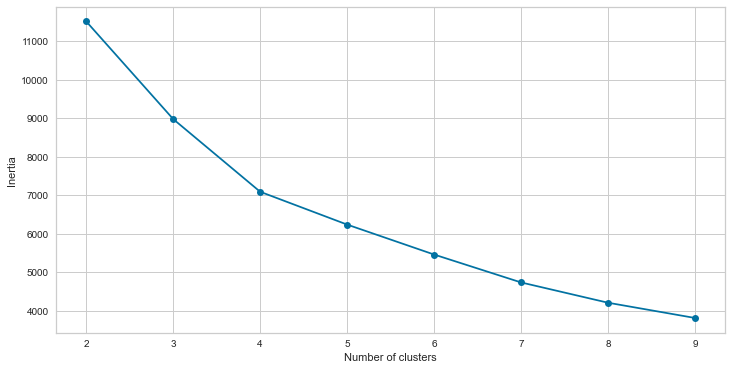

In [112]:
# Plot inertia for multiple cluster solutions against the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(cust_kmeans_scaled_df_2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
cust_df_frame_2 = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(cust_df_frame_2['Cluster'], cust_df_frame_2['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [114]:
# Defining the kmeans function with initialization as k-means++; # You want to cluster into 5 segments
kmeans_5_2 = KMeans(n_clusters = 5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans_5_2.fit(cust_kmeans_scaled_df_2)

# Inertia calculates the sum of all the points within a cluster from the centroid of that cluster.
# Determine inertia on the fitted data
kmeans_5_2.inertia_



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

6254.286636888376

In [115]:
pred_clus5_2 = kmeans_5_2.predict(cust_kmeans_scaled_df_2)

cust_df_frame_2_2 = pd.DataFrame(cust_kmeans_scaled_df_2)
cust_df_frame_2_2['cluster'] = pred_clus5_2
cust_df_frame_2_2['cluster'].value_counts()

1    2363
2    1180
3     784
4     351
0     322
Name: cluster, dtype: int64

In [116]:
cust_df_frame_2_2.head(5)

,0,1,2,cluster
0,-1.286521,-0.545834,-0.429091,3
1,-0.318484,-0.357925,-0.718046,1
2,0.262338,1.168840,-0.356852,1
3,1.230375,-0.584982,-0.627747,2
4,1.423982,-0.815954,-0.573568,2


In [117]:
# Get the cluster centroids
print(kmeans_5_2.cluster_centers_)

# Create a new data column cluster5_2 to incorporate a cluster indicator variable running from 1 to 5
cust_df_frame_2_2['cluster5_2_2'] = cust_df_frame_2_2['cluster'] + 1
cust_df_frame_2_2.head(5)

# Get the cluster labels
print(kmeans_5_2.labels_)

cust_df_frame_2_2['cluster5_2_2'].value_counts()

[[ 0.02002814  0.34268763  2.70168344]
 [-0.0955448  -0.2533802  -0.21731177]
 [ 1.16950352 -0.22660356 -0.17613279]
 [-1.4984027  -0.234579   -0.22474455]
 [ 0.04004805  2.67719128  0.07863834]]


,0,1,2,cluster,cluster5_2_2
0,-1.286521,-0.545834,-0.429091,3,4
1,-0.318484,-0.357925,-0.718046,1,2
2,0.262338,1.168840,-0.356852,1,2
3,1.230375,-0.584982,-0.627747,2,3
4,1.423982,-0.815954,-0.573568,2,3


[3 1 1 ... 4 0 1]


2    2363
3    1180
4     784
5     351
1     322
Name: cluster5_2_2, dtype: int64

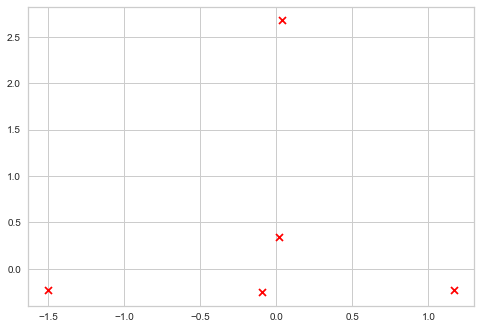

In [118]:
plt.scatter(kmeans_5_2.cluster_centers_[:, 0], kmeans_5_2.cluster_centers_[:, 1], c='red', marker='x')

In [119]:
print(silhouette_score(cust_df_frame_2_2, kmeans.labels_))

0.23877052259387838


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=5,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=0,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='silhouette', timings=False)

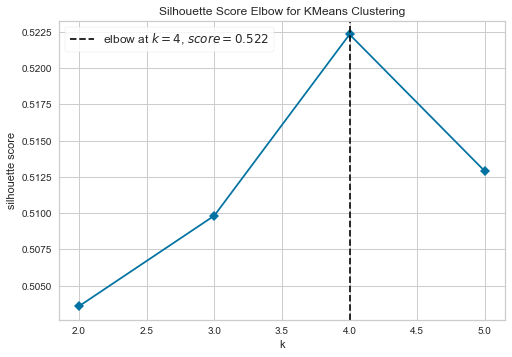

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [120]:

# Instantiate a scikit-learn K-Means model
model_2 = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer_2 = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer_2.fit(cust_df_frame_2_2)    
visualizer_2.poof()  

In [123]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_ALL_2 = pd.DataFrame(pd.concat([cust_df_frame_2_2, customer_data], axis = 1))


In [125]:
cust_df_clus5_ALL_2.shape


(5000, 72)

In [127]:
cust_df_clus5_ALL_2.info

<bound method DataFrame.info of              0         1         2  cluster  cluster5_2_2       CustomerID  \
0    -1.286521 -0.545834 -0.429091        3             4  3964-QJWTRG-NPN   
1    -0.318484 -0.357925 -0.718046        1             2  0648-AIPJSP-UVM   
2     0.262338  1.168840 -0.356852        1             2  5195-TLUDJE-HVO   
3     1.230375 -0.584982 -0.627747        2             3  4459-VLPQUH-3OL   
4     1.423982 -0.815954 -0.573568        2             3  8158-SMTQFB-CNO   
...        ...       ...       ...      ...           ...              ...   
4995 -0.124877  1.615125  2.550756        0             1  3675-GZFGOT-QJN   
4996 -1.092914 -0.240481  0.510013        3             4  4699-LEPCCE-3UD   
4997 -0.705699  1.247136  0.961504        4             5  8485-LLUICH-CVV   
4998  0.843160 -0.432305  2.424338        0             1  9325-URAAUT-7FA   
4999 -0.124877 -0.424476  0.401654        1             2  8027-EXDZBF-OGR   

      Region TownSize  Gender  

In [129]:
# Using pandas crosstabs to create a cross tab of clusters by loan defaults
pd.crosstab(cust_df_clus5_ALL_2['cluster5_2_2'],cust_df_clus5_ALL_2['LoanDefault'],margins=True, normalize = 'columns')

LoanDefault,No,Yes,All
cluster5_2_2,,,
1,0.061896,0.072588,0.0644
2,0.468530,0.485909,0.4726
3,0.228780,0.259607,0.2360
4,0.154348,0.164816,0.1568
5,0.086446,0.017079,0.0702


In [131]:
#Extracting the cluster data from the original cluster solution and saving it as a DataFrame with an index
cust_df_kmeans_cluster5_2_2 = pd.DataFrame(cust_df_frame_2_2['cluster5_2_2'])
cust_df_kmeans_cluster5_2_2.head()

# Checking on the size and shape of the DataFrame
cust_df_kmeans_cluster5_2_2.shape

cust_df_kmeans_2.head(5)





,cluster5_2_2
0,4
1,2
2,2
3,3
4,3


(5000, 1)

,TVWatchingHours,VoiceLastMonth_Coded,HHIncome
0,13,19.50,31000.0
1,18,26.70,15000.0
2,21,85.20,35000.0
3,26,18.00,20000.0
4,27,9.15,23000.0


In [132]:
# Joining the clusters from kmeans to the original data used for clustering
cust_df_clus5_rf_2 = pd.DataFrame(pd.concat([cust_df_kmeans_cluster5_2_2, cust_df_kmeans_2], axis = 1))

cust_df_clus5_rf_2.head()

cust_df_clus5_rf_2.shape

# Check on the cluster distribution after extraction and concatenating
cust_df_clus5_rf_2['cluster5_2_2'].value_counts()

,cluster5_2_2,TVWatchingHours,VoiceLastMonth_Coded,HHIncome
0,4,13,19.50,31000.0
1,2,18,26.70,15000.0
2,2,21,85.20,35000.0
3,3,26,18.00,20000.0
4,3,27,9.15,23000.0


(5000, 4)

2    2363
3    1180
4     784
5     351
1     322
Name: cluster5_2_2, dtype: int64